In [1]:
import numpy as np
import numpy.matlib
from utils import mat2euler
import math
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 12.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'

# for auto-reloading extenrnal modules
%load_ext autoreload
%autoreload 2

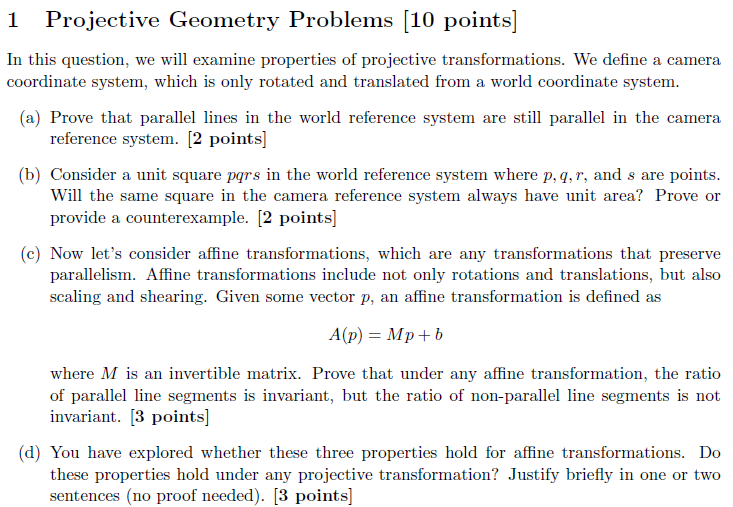
from https://github.com/chizhang529/cs231a/tree/master/Homework
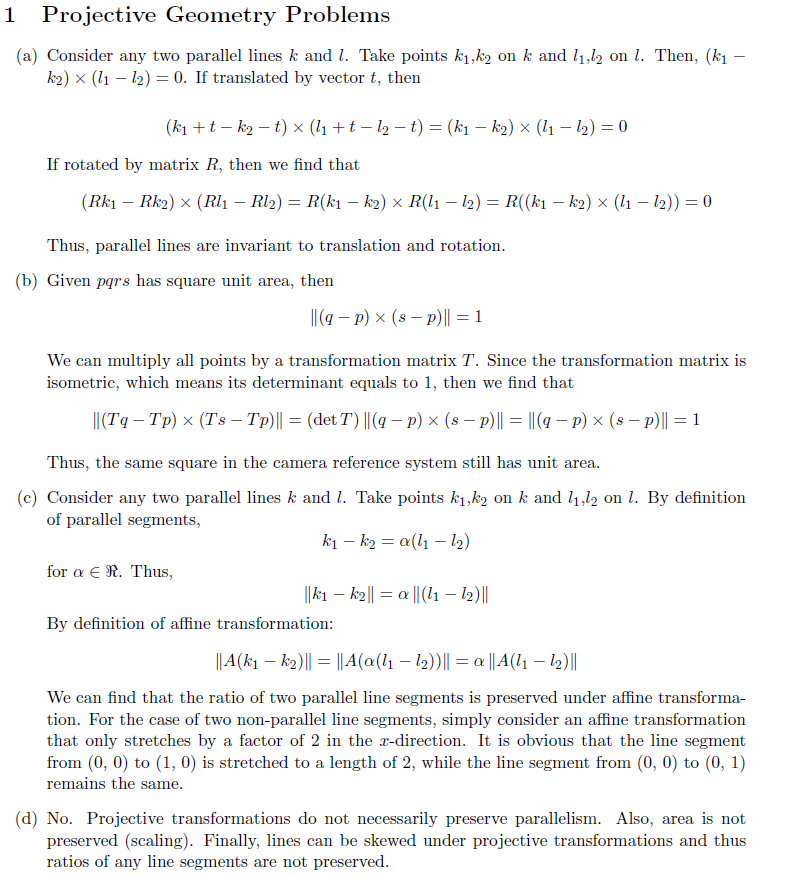

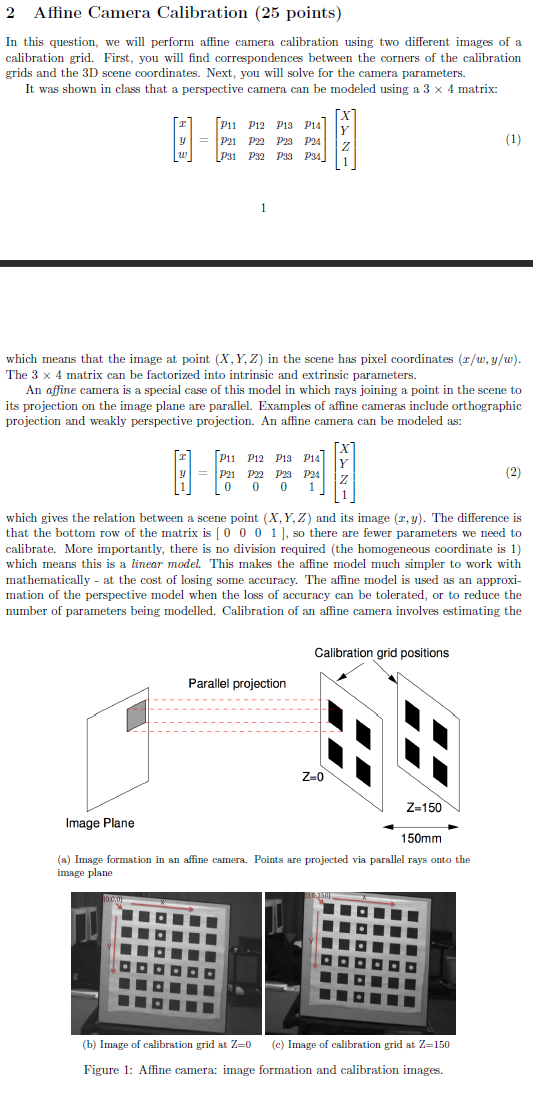
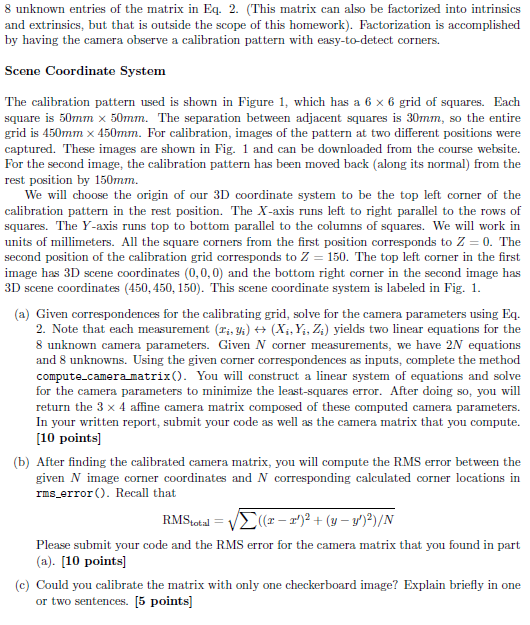

In [2]:
real_XY = np.load('./real_XY.npy')
front_image = np.load('./front_image.npy')
back_image = np.load('./back_image.npy')
real_XY,front_image,back_image

$(x = PX)^T \rightarrow x^T = X^TP^T$

In [3]:
n = real_XY.shape[0]
zFront = np.zeros((n,1))
zBack = np.zeros((n,1)) + 150
XWFront = np.concatenate((real_XY,zFront,np.ones((n,1))),axis = 1)
XWBack = np.concatenate((real_XY,zBack,np.ones((n,1))),axis = 1)
XW = np.concatenate((XWFront,XWBack),axis = 0)

XIFront = np.concatenate((front_image,np.ones((n,1))),axis = 1)
XIBack = np.concatenate((back_image,np.ones((n,1))),axis = 1)
XI = np.concatenate((XIFront,XIBack),axis = 0)
camera_matrixT = np.linalg.lstsq(XW, XI, rcond=None)

print(camera_matrixT[0].T)

[[ 5.31276507e-01 -1.80886074e-02  1.20509667e-01  1.29720641e+02]
 [ 4.84975447e-02  5.36366401e-01 -1.02675222e-01  4.43879607e+01]
 [-1.71208112e-18  2.25600086e-18 -8.35267501e-19  1.00000000e+00]]


In [4]:
def compute_camera_matrix(real_XY, front_image, back_image):
    '''
    DATA FORMAT
    In this problem, we provide and load the data for you. Recall that in the original
    problem statement, there exists a grid of black squares on a white background. We
    know how these black squares are setup, and thus can determine the locations of
    specific points on the grid (namely the corners). We also have images taken of the
    grid at a front image (where Z = 0) and a back image (where Z = 150). The data we
    load for you consists of three parts: real_XY, front_image, and back_image. For a
    corner (0,0), we may see it at the (137, 44) pixel in the front image and the
    (148, 22) pixel in the back image. Thus, one row of real_XY will contain the numpy
    array [0, 0], corresponding to the real XY location (0, 0). The matching row in
    front_image will contain [137, 44] and the matching row in back_image will contain
    [148, 22]
    '''

    '''
    COMPUTE_CAMERA_MATRIX
    Arguments:
         real_XY - Each row corresponds to an actual point on the 2D plane
         front_image - Each row is the pixel location in the front image where Z=0
         back_image - Each row is the pixel location in the back image where Z=150
    Returns:
        camera_matrix - The calibrated camera matrix (3x4 matrix)
    '''
    n = real_XY.shape[0]
    zFront = np.zeros((n,1))
    zBack = np.zeros((n,1)) + 150
    XWFront = np.concatenate((real_XY,zFront,np.ones((n,1))),axis = 1)
    XWBack = np.concatenate((real_XY,zBack,np.ones((n,1))),axis = 1)
    XW = np.concatenate((XWFront,XWBack),axis = 0)

    XIFront = np.concatenate((front_image,np.ones((n,1))),axis = 1)
    XIBack = np.concatenate((back_image,np.ones((n,1))),axis = 1)
    XI = np.concatenate((XIFront,XIBack),axis = 0)
    camera_matrixT = np.linalg.lstsq(XW, XI, rcond=None)
    return camera_matrixT[0].T

In [5]:
camera_matrix = compute_camera_matrix(real_XY, front_image, back_image)
np.set_printoptions(precision=4,suppress=True)
print('camera_matrix is: \n',camera_matrix)

camera_matrix is: 
 [[  0.5313  -0.0181   0.1205 129.7206]
 [  0.0485   0.5364  -0.1027  44.388 ]
 [ -0.       0.      -0.       1.    ]]


In [6]:
def rms_error(camera_matrix, real_XY, front_image, back_image):
    """Computes RMS error of points reprojected into the images.
    Args:
        camera_matrix: The camera matrix of the calibrated camera.
        real_XY: Each row corresponds to an actual point on the 2D plane.
        front_image: Each row is the pixel location in the front image (Z=0).
        back_image: Each row is the pixel location in the back image (Z=150).
    Returns:
        rms_error: The root mean square error of reprojecting the points back
            into the images.
    """
    n = real_XY.shape[0]
    zFront = np.zeros((n,1))
    zBack = np.zeros((n,1)) + 150
    XWFront = np.concatenate((real_XY,zFront,np.ones((n,1))),axis = 1)
    XWBack = np.concatenate((real_XY,zBack,np.ones((n,1))),axis = 1)
    XW = np.concatenate((XWFront,XWBack),axis = 0)

    # XIFront = np.concatenate((front_image,np.ones((n,1))),axis = 1)
    # XIBack = np.concatenate((back_image,np.ones((n,1))),axis = 1)
    XI = np.concatenate((front_image,back_image),axis = 0)
    errorSquared = 0
    for i in range(XW.shape[0]):
        XC = camera_matrix.dot(XW[i,:])
        XCNew = np.array([XC[0]/XC[2],XC[1]/XC[2]])
        errorSquared += np.sum((XCNew-XI[i,:])**2)
    error = np.sqrt(errorSquared/XW.shape[0])
    return error

In [7]:
error = rms_error(camera_matrix, real_XY, front_image, back_image)
print('RMS Error is:', error)

RMS Error is: 0.9938304832798489


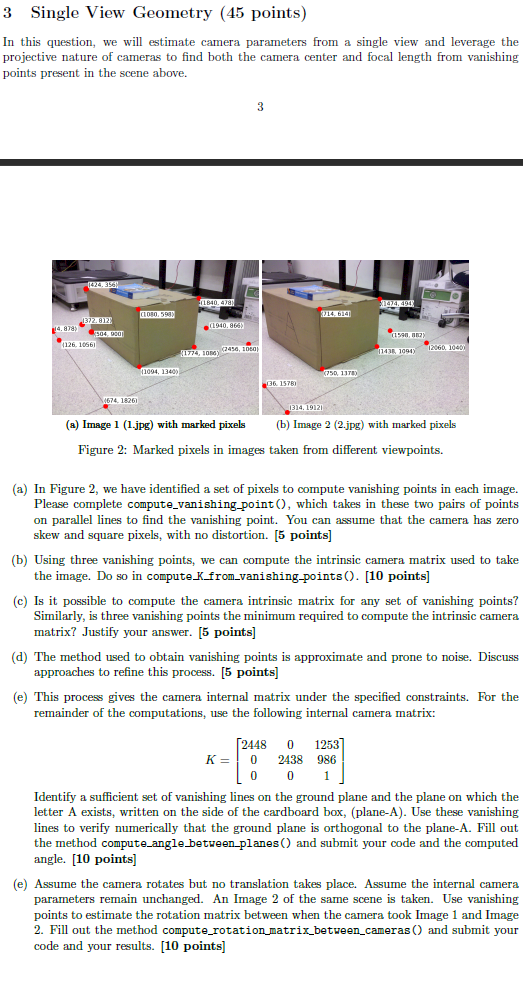

In [8]:
pointsa1 = np.array([[674, 1826], [2456, 1060], [1094, 1340], [1774, 1086]])
pointsa2 = np.array([[674, 1826], [126, 1056], [2456, 1060], [1940, 866]])
pointsa3 = np.array([[1094, 1340], [1080, 598], [1774, 1086], [1840, 478]])
pointsb1 = np.array([[314, 1912], [2060, 1040], [750, 1378], [1438, 1094]])
pointsb2 = np.array([[314, 1912], [36, 1578], [2060, 1040], [1598, 882]])
pointsb3 = np.array([[750, 1378], [714, 614], [1438, 1094], [1474, 494]])

In [9]:
def compute_vanishing_point(points):
    """Computes vanishing point given four points on parallel line.
    Args:
        points: A list of all the points where each row is (x, y). Generally,
            it will contain four points: two for each parallel line.
            You can use any convention you'd like, but our solution uses the
            first two rows as points on the same line and the last
            two rows as points on the same line.
    Returns:
        vanishing_point: The pixel location of the vanishing point.
    """
    line1 = points[:2]
    line2 = points[2:]
    rightHand = np.zeros((line1.shape[1],1)) -1
    a1,b1 = np.polyfit(line1[:,0], line1[:,1],1)
    line1Para = np.array([a1,-1,b1])
    a2,b2 = np.polyfit(line2[:,0], line2[:,1],1)
    line2Para = np.array([a2,-1,b2])
    point = np.cross(line1Para, line2Para)
    return (point/point[-1])

In [10]:
va1 = compute_vanishing_point(pointsa1)
va2 = compute_vanishing_point(pointsa2)
va3 = compute_vanishing_point(pointsa3)
vb1 = compute_vanishing_point(pointsb1)
vb2 = compute_vanishing_point(pointsb2)
vb3 = compute_vanishing_point(pointsb3)
va1,va2,va3,vb1,vb2,vb3

(array([6517.2222, -685.733 ,    1.    ]),
 array([-721.3165, -134.5725,    1.    ]),
 array([1190.6089, 6460.2698,    1.    ]),
 array([4400.303 , -128.8111,    1.    ]),
 array([-1395.3736,  -141.7079,     1.    ]),
 array([1045.1437, 7641.6051,    1.    ]))

In [11]:
vanishing_pointsa = [va1,va2,va3]
vanishing_pointsb = [vb1,vb2,vb3]

In [12]:
def compute_K_from_vanishing_points(vanishing_points):
    """Compute intrinsic matrix given vanishing points.
    Args:
        vanishing_points: A list of vanishing points.
    Returns:
        K: The intrinsic camera matrix (3x3 matrix).
    """
    v1,v2,v3 = vanishing_points[0], vanishing_points[1], vanishing_points[2]
    A = np.zeros((3, 4))
    A[0] = np.array([v1[0]*v2[0]+v1[1]*v2[1], v1[2]*v2[0]+v1[0]*v2[2], v1[2]*v2[1]+v1[1]*v2[2], v1[2]*v2[2]])
    A[1] = np.array([v2[0]*v3[0]+v2[1]*v3[1], v2[2]*v3[0]+v2[0]*v3[2], v2[2]*v3[1]+v2[1]*v3[2], v2[2]*v3[2]])
    A[2] = np.array([v3[0]*v1[0]+v3[1]*v1[1], v3[2]*v1[0]+v3[0]*v1[2], v3[2]*v1[1]+v3[1]*v1[2], v3[2]*v1[2]])
    U,S,Vt = np.linalg.svd(A)
    V = Vt.T
    w = V[:, -1]
    '''
    w = [w1 0  w4
         0  w1 w5
         w4 w5 w6]
    '''
    w = np.array([[w[0], 0, w[1]], 
                  [0, w[0], w[2]], 
                  [w[1], w[2], w[3]]])
    '''
    K = [alpha 0    cx
         0     beta cy
         0     0    1]
    '''
    
    K = np.linalg.inv(np.linalg.cholesky(w)).T
    K = K/K[2,2]
    return K

In [13]:
np.set_printoptions(precision=8,suppress=True)
K1 = compute_K_from_vanishing_points(vanishing_pointsa)
K2 = compute_K_from_vanishing_points(vanishing_pointsb)
K_actual = np.array([[2448.0, 0, 1253.0],[0, 2438.0, 986.0],[0,0,1.0]])
print("Calculated Matrix:\n", K1)
print("Actual Matrix:\n", K_actual)

Calculated Matrix:
 [[2594.16985325   -0.          773.28954843]
 [  -0.         2594.16985325  979.50327774]
 [   0.            0.            1.        ]]
Actual Matrix:
 [[2448.    0. 1253.]
 [   0. 2438.  986.]
 [   0.    0.    1.]]


from https://github.com/chizhang529/cs231a/tree/master/Homework
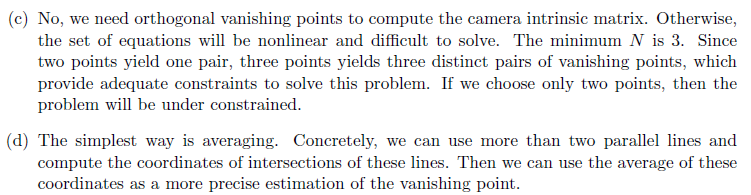

In [14]:
floor_vanishing1 = va1
floor_vanishing2 = va2
box_vanishing1 = va3
box_vanishing2 = compute_vanishing_point(np.array([[1094,1340],[1080,598],[504,900],[424,356]]))

In [15]:
def compute_angle_between_planes(vanishing_pair1, vanishing_pair2, K):
    """Compute angle between planes of the given pairs of vanishing points.
    Args:
        vanishing_pair1: A list of a pair of vanishing points computed from
            lines within the same plane.
        vanishing_pair2: A list of another pair of vanishing points from a
            different plane than vanishing_pair1.
        K: The camera matrix used to take both images.
    Returns:
        angle: The angle in degrees between the planes which the vanishing
            point pair comes from2.
    """
    L1 = np.cross(vanishing_pair1[0], vanishing_pair1[1])
    L2 = np.cross(vanishing_pair2[0], vanishing_pair2[1])
    w_inv = K.dot(K.T)
    w = np.linalg.inv(w_inv)
    cos = L1.T.dot(w_inv).dot(L2) / np.sqrt(L1.T.dot(w_inv).dot(L1) * L2.T.dot(w_inv).dot(L2))
    angle = np.arccos(cos) * 180 / math.pi
    return angle

In [16]:
angle = compute_angle_between_planes(
        [floor_vanishing1, floor_vanishing2],
        [box_vanishing1, box_vanishing2], K_actual)
print("Angle between floor and box:", angle)


Angle between floor and box: 94.70511865604328


In [17]:
Kinv = np.linalg.inv(K_actual)
v1 = np.stack(np.array([va1, va2, va3])).T
v2 = np.stack(np.array([vb1, vb2, vb3]))
d1 = Kinv.dot(v1) / np.linalg.norm(Kinv.dot(v1))
d2 = Kinv.dot(v2) / np.linalg.norm(Kinv.dot(v2))

In [18]:
v1.shape,d1.T, d2.T

((3, 3),
 array([[ 0.57475152, -0.18326965,  0.26727438],
        [-0.21555728, -0.12284673,  0.26727438],
        [-0.00681191,  0.60013621,  0.26727438]]),
 array([[-0.0578969 , -0.04596299,  0.11349517],
        [-0.42474814, -0.33561191,  0.82982398],
        [-0.00005554, -0.00004387,  0.00010859]]))

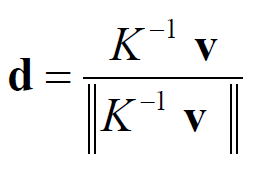

In [19]:
def compute_rotation_matrix_between_cameras(vanishing_pts1, vanishing_pts2, K):
    """Compute rotation matrix between two cameras given their vanishing points.
    Args:
        vanishing_pts1: A list of vanishing points in image 1.
        vanishing_pts2: A list of vanishing points in image 2.
        K: The camera matrix used to take both images.
    Returns:
        R: The rotation matrix between camera 1 and camera 2.
    """
    Kinv = np.linalg.inv(K)
    v1 = vanishing_pts1.T
    v2 = vanishing_pts2.T
    d1 = Kinv.dot(v1) / np.linalg.norm(Kinv.dot(v1))
    d2 = Kinv.dot(v2) / np.linalg.norm(Kinv.dot(v2))
    # d2 = R * d1, R = d2*inv(d1)
    R = d2.dot(np.linalg.inv(d1))
    return R

In [20]:
rotation_matrix = compute_rotation_matrix_between_cameras(np.array([va1, va2, va3]), np.array([vb1, vb2, vb3]), K_actual)
z,y,x = mat2euler(rotation_matrix)
print("Rotation between two cameras:\n", rotation_matrix)
print("Angle around z-axis (pointing out of camera): %f degrees" % (z * 180 / math.pi))
print("Angle around y-axis (pointing vertically): %f degrees" % (y * 180 / math.pi))
print("Angle around x-axis (pointing horizontally): %f degrees" % (x * 180 / math.pi))

Rotation between two cameras:
 [[ 0.81955125  0.13583647 -0.36992845]
 [ 0.09098984  1.16646489  0.14206013]
 [-0.         -0.          1.01061171]]
Angle around z-axis (pointing out of camera): -9.410931 degrees
Angle around y-axis (pointing vertically): -19.924588 degrees
Angle around x-axis (pointing horizontally): -8.001552 degrees


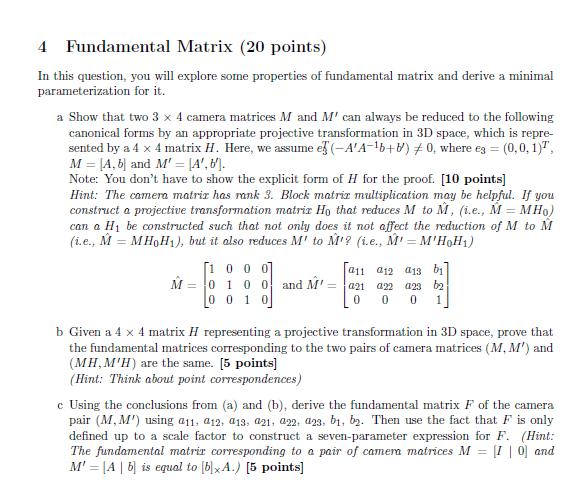

from https://github.com/chizhang529/cs231a/tree/master/Homework
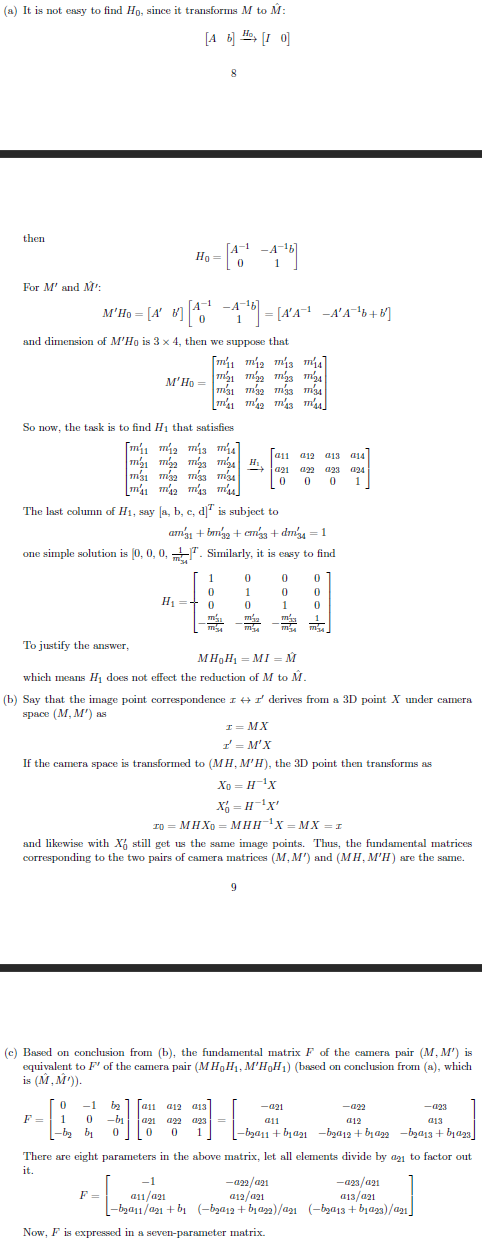